In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import bluepy as bp
%matplotlib notebook
font = {'family' : 'normal',
        'weight':'normal',
        
        'size'   : 12}

mpl.rc('font', **font)
import time
import h5py

In [2]:
allData0 = []
allData1 = []
for i in range(2):
    
    f = h5py.File(str(i)+'/voltage.h5')
    d = f['report']['All']['data']
    if i%2 == 0:
        allData0.append(d)
    else:
        allData1.append(d)


In [7]:
allData1

[<HDF5 dataset "data": shape (110000, 970), type "<f4">]

<IPython.core.display.Javascript object>


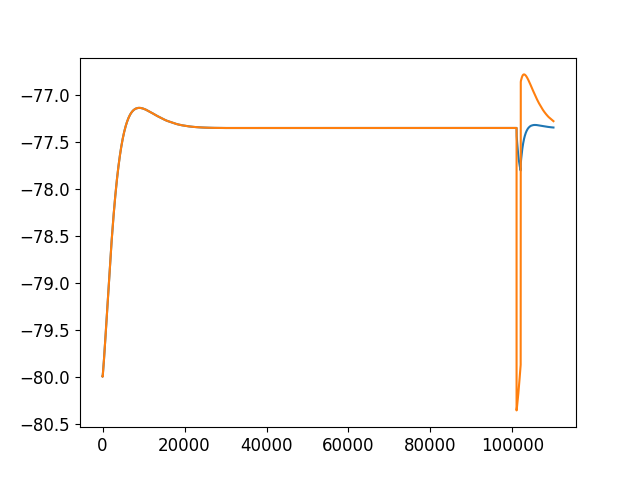

In [4]:
plt.figure()
plt.plot(allData0[0][:,1])
plt.plot(allData1[0][:,1])
plt.show()

In [24]:
positions.item().keys()

dict_keys(['cADpyr_L5TPC[0].soma[0](0.5)', 'cADpyr_L5TPC[0].axon[0](0.5)', 'cADpyr_L5TPC[0].axon[1](0.5)', 'cADpyr_L5TPC[0].axon[2](0.25)', 'cADpyr_L5TPC[0].axon[2](0.5)', 'cADpyr_L5TPC[0].axon[2](0.75)', 'cADpyr_L5TPC[0].axon[3](0.166667)', 'cADpyr_L5TPC[0].axon[3](0.333333)', 'cADpyr_L5TPC[0].axon[3](0.5)', 'cADpyr_L5TPC[0].axon[3](0.666667)', 'cADpyr_L5TPC[0].axon[3](0.833333)', 'cADpyr_L5TPC[0].axon[4](0.5)', 'cADpyr_L5TPC[0].axon[5](0.5)', 'cADpyr_L5TPC[0].axon[6](0.2)', 'cADpyr_L5TPC[0].axon[6](0.4)', 'cADpyr_L5TPC[0].axon[6](0.6)', 'cADpyr_L5TPC[0].axon[6](0.8)', 'cADpyr_L5TPC[0].axon[7](0.25)', 'cADpyr_L5TPC[0].axon[7](0.5)', 'cADpyr_L5TPC[0].axon[7](0.75)', 'cADpyr_L5TPC[0].axon[8](0.25)', 'cADpyr_L5TPC[0].axon[8](0.5)', 'cADpyr_L5TPC[0].axon[8](0.75)', 'cADpyr_L5TPC[0].axon[9](0.5)', 'cADpyr_L5TPC[0].axon[10](0.5)', 'cADpyr_L5TPC[0].axon[11](0.2)', 'cADpyr_L5TPC[0].axon[11](0.4)', 'cADpyr_L5TPC[0].axon[11](0.6)', 'cADpyr_L5TPC[0].axon[11](0.8)', 'cADpyr_L5TPC[0].axon[12](0.5)

In [25]:
positions1.item().keys()

dict_keys(['cADpyr_L5TPC[0].soma[0](0.5)', 'cADpyr_L5TPC[0].axon[0](0.5)', 'cADpyr_L5TPC[0].axon[1](0.5)', 'cADpyr_L5TPC[0].axon[2](0.25)', 'cADpyr_L5TPC[0].axon[2](0.5)', 'cADpyr_L5TPC[0].axon[2](0.75)', 'cADpyr_L5TPC[0].axon[3](0.166667)', 'cADpyr_L5TPC[0].axon[3](0.333333)', 'cADpyr_L5TPC[0].axon[3](0.5)', 'cADpyr_L5TPC[0].axon[3](0.666667)', 'cADpyr_L5TPC[0].axon[3](0.833333)', 'cADpyr_L5TPC[0].axon[4](0.5)', 'cADpyr_L5TPC[0].axon[5](0.5)', 'cADpyr_L5TPC[0].axon[6](0.2)', 'cADpyr_L5TPC[0].axon[6](0.4)', 'cADpyr_L5TPC[0].axon[6](0.6)', 'cADpyr_L5TPC[0].axon[6](0.8)', 'cADpyr_L5TPC[0].axon[7](0.25)', 'cADpyr_L5TPC[0].axon[7](0.5)', 'cADpyr_L5TPC[0].axon[7](0.75)', 'cADpyr_L5TPC[0].axon[8](0.25)', 'cADpyr_L5TPC[0].axon[8](0.5)', 'cADpyr_L5TPC[0].axon[8](0.75)', 'cADpyr_L5TPC[0].axon[9](0.5)', 'cADpyr_L5TPC[0].axon[10](0.5)', 'cADpyr_L5TPC[0].axon[11](0.2)', 'cADpyr_L5TPC[0].axon[11](0.4)', 'cADpyr_L5TPC[0].axon[11](0.6)', 'cADpyr_L5TPC[0].axon[11](0.8)', 'cADpyr_L5TPC[0].axon[12](0.5)

In [3]:
positions = np.load('0/positions.npy',allow_pickle=True)
phi = np.load('0/fields.npy',allow_pickle=True)
time = np.load('0/times.npy',allow_pickle=True)

positions1 = np.load('1/positions.npy',allow_pickle=True)
phi1 = np.load('1/fields.npy',allow_pickle=True)
time1 = np.load('1/times.npy',allow_pickle=True)

In [4]:
plt.figure()
plt.plot(time[10],phi[10])
plt.plot(time1[10],phi1[10])
plt.show()

<IPython.core.display.Javascript object>

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [9]:
positions = positions.item().values()

In [11]:
phi = phi.item().values()

In [15]:
positions = np.array(list(positions))
phi = np.array(list(phi))

In [18]:
np.shape(phi)

(782, 5)

<IPython.core.display.Javascript object>


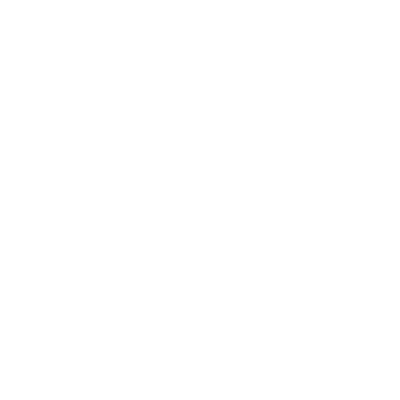

IndexError: too many indices for array: array is 0-dimensional, but 2 were indexed

In [5]:
plt.figure(figsize=(5,5))
colors = phi[:,2]
plt.title('Difference im amplitude \nbetween 5.4 Hz and 857 Hz')
plt.scatter(positions[:,0],positions[:,1],c=colors,norm=mpl.colors.CenteredNorm(),cmap='seismic')
plt.colorbar(label='Amplitude difference (mV)')
plt.show()

<IPython.core.display.Javascript object>


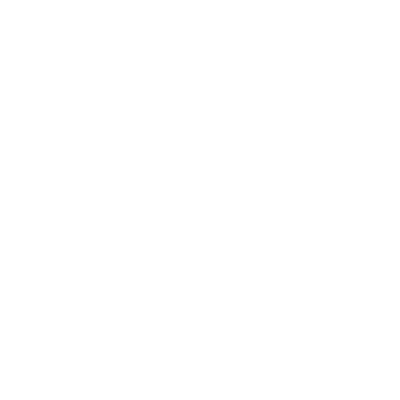

IndexError: too many indices for array: array is 0-dimensional, but 2 were indexed

In [6]:
plt.figure(figsize=(5,5))
colors = phi[:,2]
plt.title('Difference im amplitude \nbetween 5.4 Hz and 857 Hz')
plt.scatter(positions[notAxon,0],positions[notAxon,1],c=colors[notAxon],norm=mpl.colors.CenteredNorm(),cmap='seismic')
plt.colorbar(label='Amplitude difference (mV)')
plt.show()

<IPython.core.display.Javascript object>


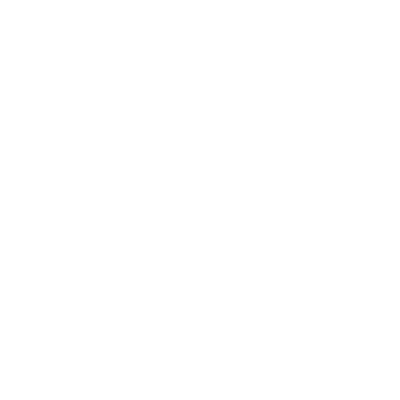

NameError: name 'data' is not defined

In [7]:
plt.figure(figsize=(5,5))
colors = data
plt.title('Difference im amplitude \nbetween 5.4 Hz and 857 Hz')
plt.scatter(positions[:,0],positions[:,1],c=colors,norm=mpl.colors.CenteredNorm(),cmap='seismic')
plt.colorbar(label='Amplitude difference (mV)')
plt.show()

<IPython.core.display.Javascript object>


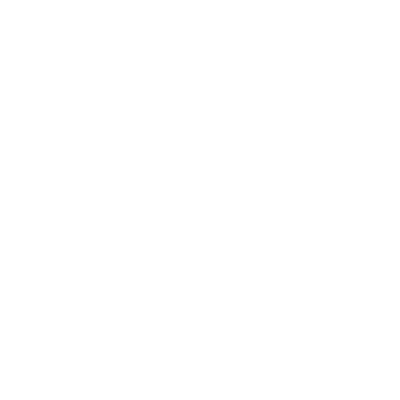

NameError: name 'data' is not defined

In [8]:
plt.figure(figsize=(5,5))
colors = data
plt.title('Difference im amplitude \nbetween 5.4 Hz and 857 Hz')
plt.scatter(positions[notAxon,0],positions[notAxon,1],c=colors[notAxon],norm=mpl.colors.CenteredNorm(),cmap='seismic')
plt.colorbar(label='Amplitude difference (mV)')
plt.show()

In [7]:
data = []
allData = []
for i in range(10):
    try:
        f = h5py.File(str(i)+'/voltage.h5')
        d = f['report']['All']['data']
        allData.append(d[60000:])
        data.append(np.max(d[60000:,2])-np.min(d[60000:,2]))
    except:
        allData.append([np.nan])
        data.append(np.nan)

plt.figure(figsize=(5,5))
plt.loglog(np.logspace(0,3.3,10),data)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Membrane potential\n amplitude (mV)')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

In [8]:
data = []
allData = []
for i in range(10):
    try:
        f = h5py.File(str(i)+'/voltage.h5')
        d = f['report']['All']['data']
        allData.append(d[60000:])
        data.append(np.max(d[60000:,575])-np.min(d[60000:,575]))
    except:
        allData.append([np.nan])
        data.append(np.nan)

plt.figure(figsize=(5,5))
plt.loglog(np.logspace(0,3.3,10),data)

data = []
allData = []
for i in range(10):
    try:
        f = h5py.File(str(i)+'/voltage.h5')
        d = f['report']['All']['data']
        allData.append(d[60000:])
        data.append(np.max(d[60000:,579])-np.min(d[60000:,579]))
    except:
        allData.append([np.nan])
        data.append(np.nan)
        
plt.loglog(np.logspace(0,3.3,10),data)        
        
plt.xlabel('Frequency (Hz)')
plt.ylabel('Membrane potential\n amplitude (mV)')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

In [ ]:
data = []
allData = []
for i in range(10):
    try:
        f = h5py.File(str(i)+'/voltage.h5')
        d = f['report']['All']['data']
        allData.append(d[60000:])
        data.append(np.max(d[60000:,580])-np.min(d[60000:,580]))
    except:
        allData.append([np.nan])
        data.append(np.nan)

plt.figure(figsize=(5,5))
plt.loglog(np.logspace(0,3.3,10),data)

data = []
allData = []
for i in range(10):
    try:
        f = h5py.File(str(i)+'/voltage.h5')
        d = f['report']['All']['data']
        allData.append(d[60000:])
        data.append(np.max(d[60000:,589])-np.min(d[60000:,589]))
    except:
        allData.append([np.nan])
        data.append(np.nan)
        
plt.loglog(np.logspace(0,3.3,10),data)        
        
plt.xlabel('Frequency (Hz)')
plt.ylabel('Membrane potential\n amplitude (mV)')
plt.tight_layout()
plt.show()

In [ ]:
data = []
allData = []
for i in range(10):
    try:
        f = h5py.File(str(i)+'/voltage.h5')
        d = f['report']['All']['data']
        allData.append(d[60000:])
        data.append(np.max(d[60000:,590])-np.min(d[60000:,590]))
    except:
        allData.append([np.nan])
        data.append(np.nan)

plt.figure(figsize=(5,5))
plt.loglog(np.logspace(0,3.3,10),data)

data = []
allData = []
for i in range(10):
    try:
        f = h5py.File(str(i)+'/voltage.h5')
        d = f['report']['All']['data']
        allData.append(d[60000:])
        data.append(np.max(d[60000:,599])-np.min(d[60000:,599]))
    except:
        allData.append([np.nan])
        data.append(np.nan)
        
plt.loglog(np.logspace(0,3.3,10),data)  

data = []
allData = []
for i in range(10):
    try:
        f = h5py.File(str(i)+'/voltage.h5')
        d = f['report']['All']['data']
        allData.append(d[60000:])
        data.append(np.max(d[60000:,673])-np.min(d[60000:,673]))
    except:
        allData.append([np.nan])
        data.append(np.nan)
        
plt.loglog(np.logspace(0,3.3,10),data)  
        
plt.xlabel('Frequency (Hz)')
plt.ylabel('Membrane potential\n amplitude (mV)')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


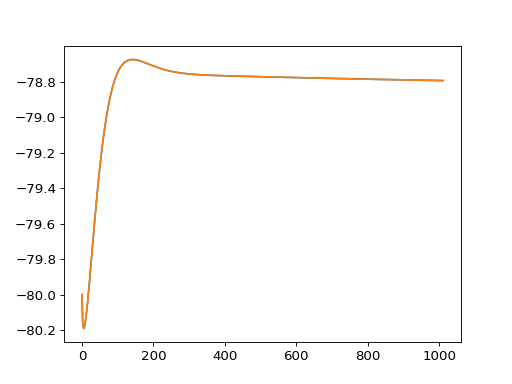

In [3]:
plt.figure()

time = np.arange(0,1010,0.01)

# plt.plot(time,allData0[0][:,0]-allData0[0][40000,0])
# plt.plot(time,allData1[0][:,0]-allData0[0][40000,0])

plt.plot(time,allData0[0][:,0])
plt.plot(time,allData1[0][:,0])

plt.show()

<IPython.core.display.Javascript object>


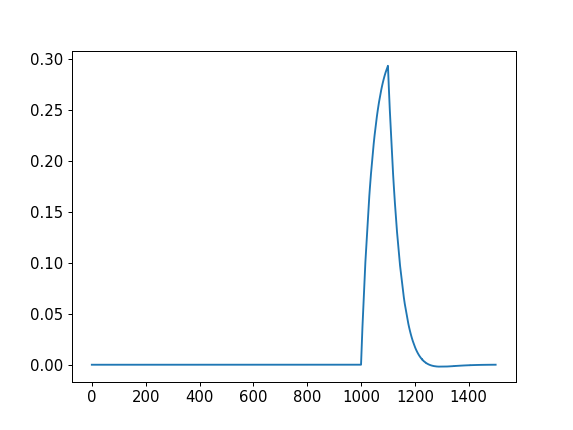

In [11]:
plt.figure()

time = np.arange(0,1500,0.01)

# plt.plot(time,allData0[0][:,0]-allData0[0][40000,0])
# plt.plot(time,allData1[0][:,0]-allData0[0][40000,0])

plt.plot(time,allData0[0][:,0]-allData0[0][40000,0]-(allData1[0][:,0]-allData1[0][40000,0]))

plt.show()

In [ ]:
isAxon = np.load('../testOff/1ccfb669-0f60-4b02-8565-19dece3c6af1/0/isAxon.npy')

In [ ]:
np.where(isAxon==2)

In [ ]:
np.where(isAxon==3)

In [ ]:
np.where(isAxon==0)